<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

if not os.path.exists('horses_vs_zebras/data'):
    !wget -q https://tinyurl.com/odsc-cv-platform-HvZ1 -O data.zip
    !unzip -q data.zip
    !mkdir -p horses_vs_zebras
    !mv data horses_vs_zebras


2021-09-14 20:56:14.726 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


/home/yyr/code/AutoTrain


## Verify Config

In [3]:
!cat configs/classification.ini

[project]
owner: sizhky
name: horses_vs_zebras
location: ${project.name}
model_directory: ${project.location}/models
type: classification
num_classes: 2

[label_studio]
base_data_dir: /tmp/data/

[label_studio_ml]
app_name: ${project.name}/my_ml_model
script_path: auto_train_classification/script_classification.py

[online_training]
save_dir: ${project.model_directory}/model.pt

[training]
dir: ${project.location}/data
train_ratio: 0.8

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/test

[training.preprocess]
@preprocess_function: my_preprocess
image_size: ${architecture.image_size}

[training.scheme]
epochs: 5
freeze_epochs: 3
# initial_checkpoint: ${training.scheme.output_path}
# mixup augmentation
mixup: 0.5
# cutmix
cutmix: 0.5
mixup_switch_prob: 0.3
amp: true
# random augmentations
aa: rand-m9-mstd0.5
batch_size: 8
output: ${project.model_directory}/trained-model-v1
output_path: ${training.scheme.output}/model.pt

[architecture]
image_size: 224
[

In [4]:
os.environ['CONFIG'] = 'configs/classification.ini'
!python auto_train_classification/train.py

2021-09-14 20:57:12.975 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
Could not do one pass in your dataloader, there is something wrong in it
2021-09-14 20:57:15.828 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-14 20:58:20.112 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at horses_vs_zebras/find_lr_plot.png
2021-09-14 20:58:20.112 | INFO     | __main__:train_model:40 - Using lr: 0.00013182566908653826
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 0.8726988434791565, 0.8084114789962769, 0.46875, '00:06']
[1, 0.7965710163116455, 0.6532956957817078, 0.578125, '00:06']
[2, 0.7103032469749451, 0.45521309971809387, 0.84375, '00:06']
[0, 0.4742656350135803, 0.4637604057788849, 0.8125, '00:07']
[1, 0.458913654088974, 0.4309048354625702, 0.84375, '00:07']
[2, 0.44589611887931824, 0.3916149139404297, 0.890625, '00:07']
[

---
## Validate

2021-09-14 20:59:20.560 | INFO     | auto_train_classification.infer:<module>:6 - Loaded weights from horses_vs_zebras/models/trained-model-v1/model.pt to given model


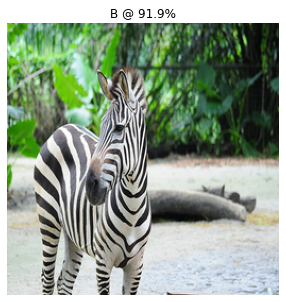

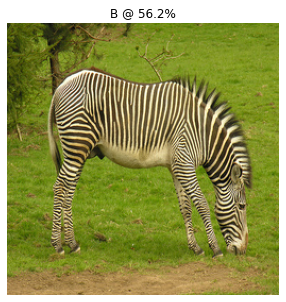

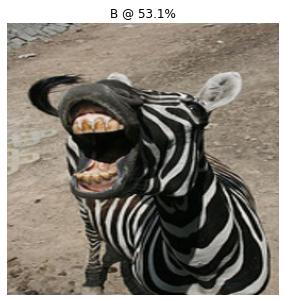

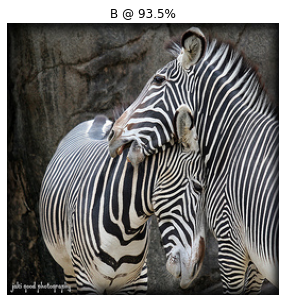

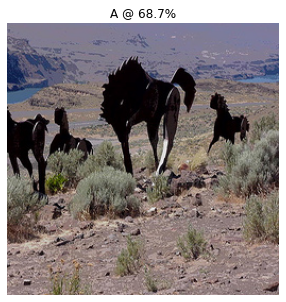

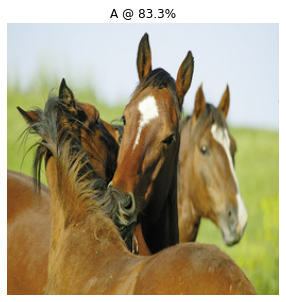

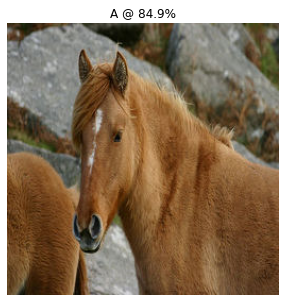

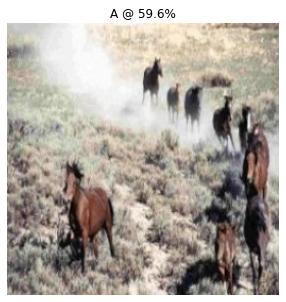

In [5]:
from auto_train_classification.infer import infer
p1 = infer('horses_vs_zebras/data/test/B')
p2 = infer('horses_vs_zebras/data/test/A')

In [6]:
p1, p2

([(» horses_vs_zebras/data/test/B/n02391049_1060.jpg, 'B', tensor(0.9194)),
  (» horses_vs_zebras/data/test/B/n02391049_2870.jpg, 'B', tensor(0.5616)),
  (» horses_vs_zebras/data/test/B/n02391049_2890.jpg, 'B', tensor(0.5312)),
  (» horses_vs_zebras/data/test/B/n02391049_1150.jpg, 'B', tensor(0.9354))],
 [(» horses_vs_zebras/data/test/A/n02381460_900.jpg, 'A', tensor(0.6868)),
  (» horses_vs_zebras/data/test/A/n02381460_1010.jpg, 'A', tensor(0.8330)),
  (» horses_vs_zebras/data/test/A/n02381460_840.jpg, 'A', tensor(0.8486)),
  (» horses_vs_zebras/data/test/A/n02381460_470.jpg, 'A', tensor(0.5957))])